# Exploratory Data Analysis

Here, we will explore the Boston Marathon data that we cleaned in the cleaning file.

## Import packages and data

Let's import the packages we will need, import the data to a pandas DataFrame, and look at some summary information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

boston = pd.read_csv('./data/boston_clean.csv')

#Display floats to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   place_overall      4553 non-null   int64  
 1   place_sex          4553 non-null   int64  
 2   place_division     4553 non-null   int64  
 3   sex                4553 non-null   int64  
 4   runner_id          4553 non-null   int64  
 5   country            4493 non-null   object 
 6   last_name          4553 non-null   object 
 7   first_name         4553 non-null   object 
 8   finish_hours       4553 non-null   float64
 9   first_half_hours   4553 non-null   float64
 10  second_half_hours  4553 non-null   float64
 11  split_diff         4553 non-null   float64
 12  bq                 4553 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 462.5+ KB


Everything is in the data types that we need. Now let's view some descriptive statistics of the overall data.

In [2]:
boston.describe()

,place_overall,place_sex,place_division,sex,runner_id,finish_hours,first_half_hours,second_half_hours,split_diff,bq
count,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00,4553.00
mean,5568.87,2578.07,1152.97,0.45,8163.61,3.52,1.66,1.86,5.38,0.51
std,4256.20,2149.17,676.13,0.50,6366.22,0.63,0.27,0.38,4.62,0.50
min,1.00,1.00,1.00,0.00,2.00,2.16,1.07,1.06,-10.32,0.00
25%,1744.00,736.00,573.00,0.00,2127.00,3.04,1.45,1.57,2.03,0.00
50%,4702.00,1843.00,1143.00,0.00,7589.00,3.42,1.63,1.79,4.61,1.00
75%,9150.00,4340.00,1713.00,1.00,12023.00,3.93,1.82,2.11,7.95,1.00
max,13847.00,7283.00,2499.00,1.00,19651.00,5.00,2.45,3.04,31.73,1.00


Right away, we can see that both the mean and median runner ran positive splits. However, there is a wide range of split differences, anywhere from -10.32% to 31.73%.

Now, let's visualize the distribution of finish times for all runners.

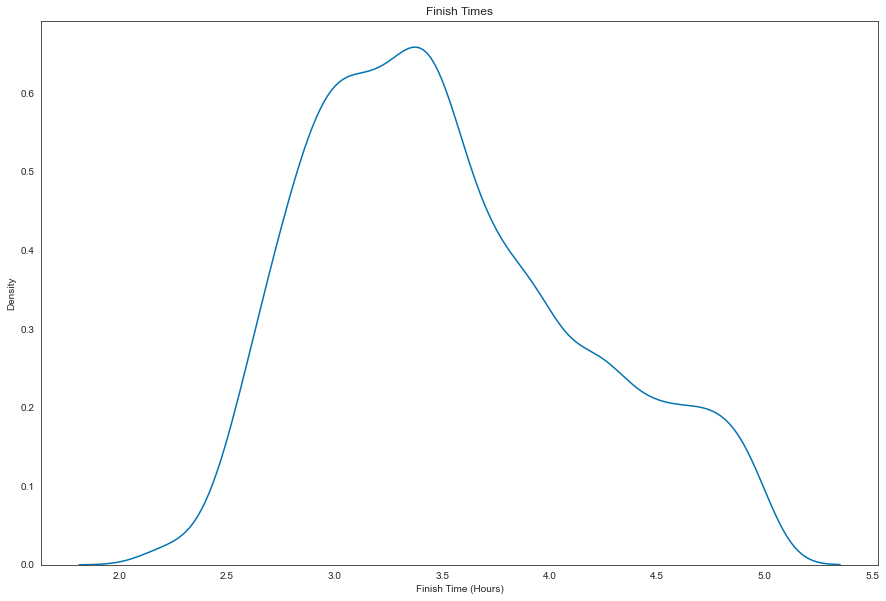

In [3]:
sns.set_style('white')
sns.set_palette('colorblind')


def marathon_plot(plottype, df, xlabel, title, x = None, y = None, hue = None):
    """Takes plot type, data, labels, x, y, and hue parameters, shows plot with those parameters."""
    fig, ax = plt.subplots(sharey = True, figsize = (15, 10))
    plottype(data = df, x = x, hue = hue, ax = ax)
    ax.set(xlabel = xlabel)
    ax.set_title(title)
    plt.show()

marathon_plot(sns.kdeplot, boston, 'Finish Time (Hours)', 'Finish Times', x = 'finish_hours')

And let's also break this distribution down by BQ vs. non-BQ

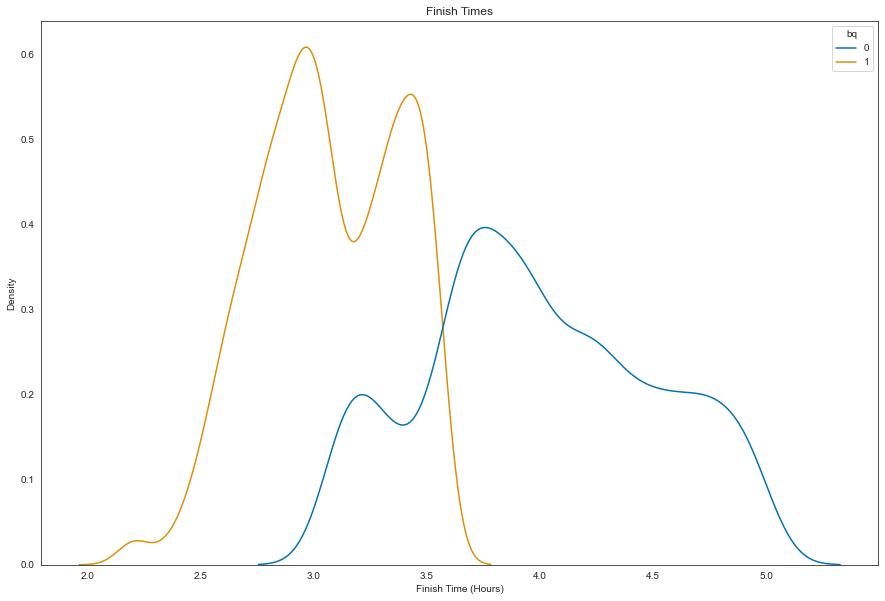

In [4]:
marathon_plot(sns.kdeplot, boston, 'Finish Time (Hours)', 'Finish Times', x = 'finish_hours', hue = 'bq')

As expected, the BQ finish times are generally faster than the non-BQ finish times. The distributions look somewhat irregular, which demonstrates how real-life data often doesn't conform exactly to a theoretical distribution.

Now let's visualize the overall distribution of split differences, with a dashed green line indicating a perfectly even-paced race. Points to the left of the line indicate a negative split (faster second half) and points to the right indicate a positive split (slower second half).

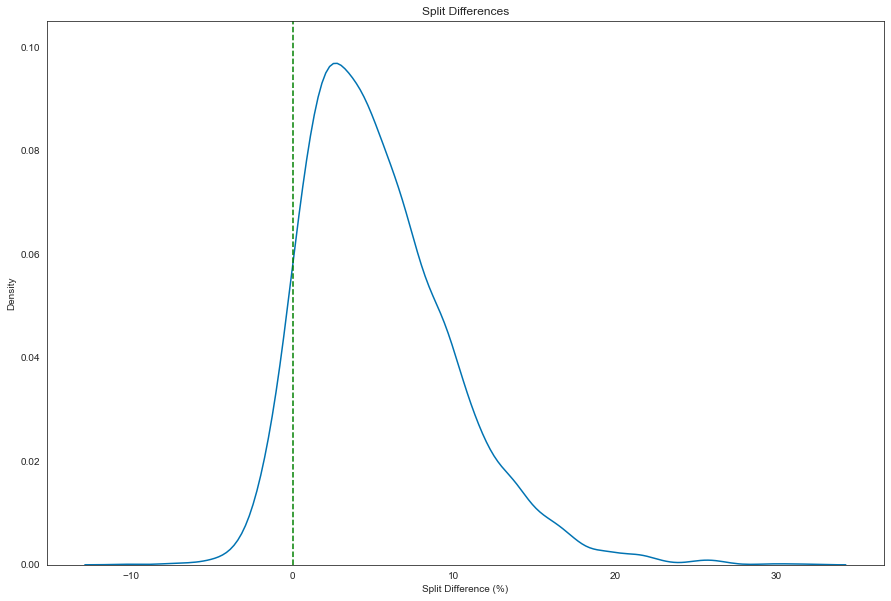

In [5]:
def marathon_plot_axline(plottype, df, xlabel, title, x = None, y = None, hue = None):
    """Takes plot type, data, labels, x, y, and hue parameters, shows plot with those parameters plus an axline."""
    fig, ax = plt.subplots(sharey = True, figsize = (15, 10))
    plottype(data = df, x = x, hue = hue, ax = ax)
    ax.set(xlabel = xlabel)
    ax.set_title(title)
    
    #Add green dashed line at x = 0
    plt.axline((0,0), (0,0.1), linestyle = '--', color = 'g')
    plt.show()

marathon_plot_axline(sns.kdeplot, boston, 'Split Difference (%)', 'Split Differences', x = 'split_diff')

The distribution looks fairly close to normal, though there is a bit of a positive skew and kurtosis (i.e., wide tails). This isn't too surprising. Based on previous research, we would expect most elite runners to be clustered closer to 0 on this distribution, with recreational runners clustered further to the right and with a wider spread overall.

Let's break this split difference distribution down by BQ vs. non-BQ.

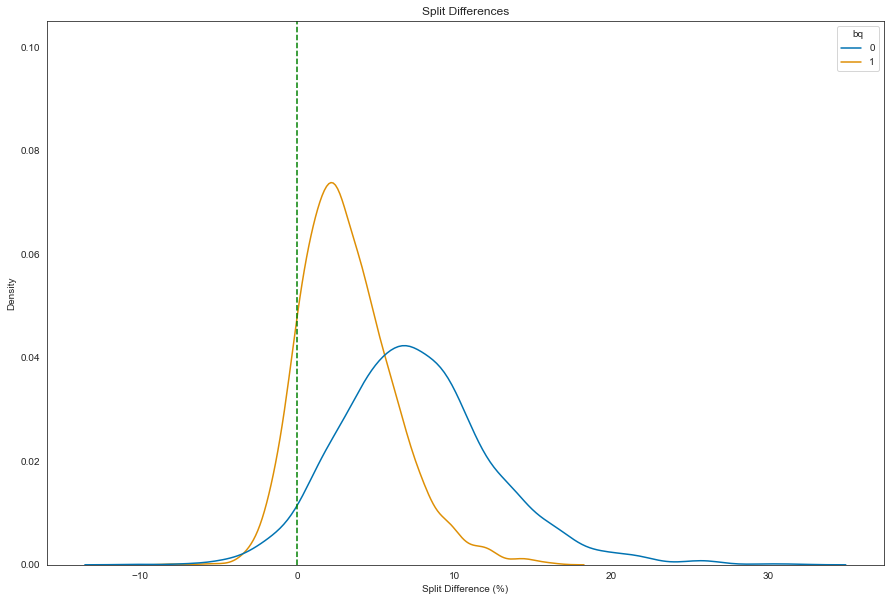

In [6]:
marathon_plot_axline(sns.kdeplot, boston, 'Split Difference (%)', 'Split Differences', x = 'split_diff', hue = 'bq')

This tends to confirm what we suspected above. Both of these individual distributions are much more bell-like, with the curve for non-BQ runners having a wider spread and longer tails. If we were to just look at these distributions, we would probably conclude that elite runners tend to run more evenly paced marathons, while more recreational runners tend to run more positively split races and have more variation in their pacing overall.

For another view of this data, let's look at a table of descriptive statistics for split difference grouped by BQ.

In [7]:
boston[['split_diff', 'bq']].groupby('bq').describe()

split_diff                                       
        count mean  std    min  25%  50%   75%   max
bq                                                  
0     2230.00 7.60 4.94 -10.32 4.30 7.22 10.34 31.73
1     2323.00 3.24 3.00  -7.93 1.13 2.82  4.99 16.34

Both the mean and standard deviation are lower for BQ runners.

Next, let's break down the distribution of finish times by sex.

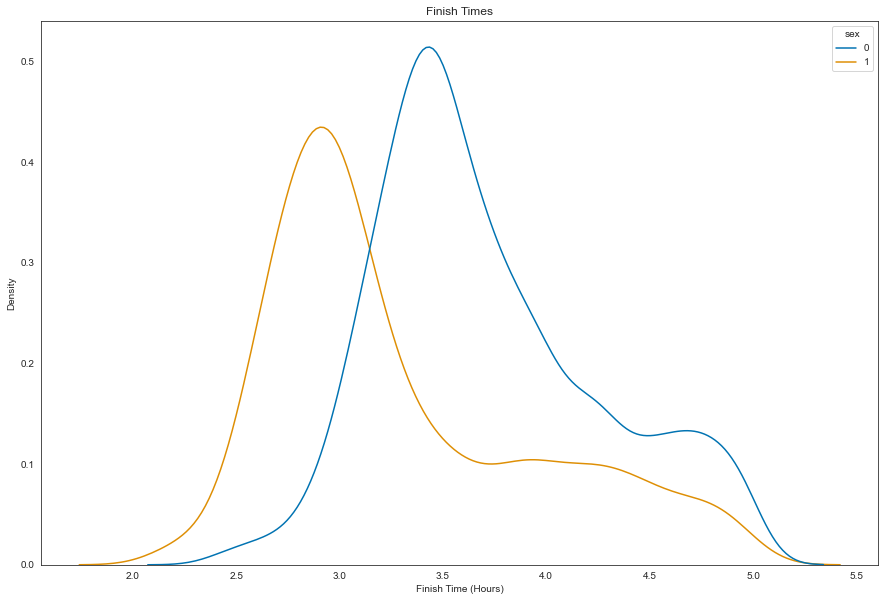

In [8]:
marathon_plot(sns.kdeplot, boston, 'Finish Time (Hours)', 'Finish Times', x = 'finish_hours', hue = 'sex')

As we would predict, the distribution of men's finish times is faster than the distribution for women's times.

Let's further break down finish times by both BQ and sex.

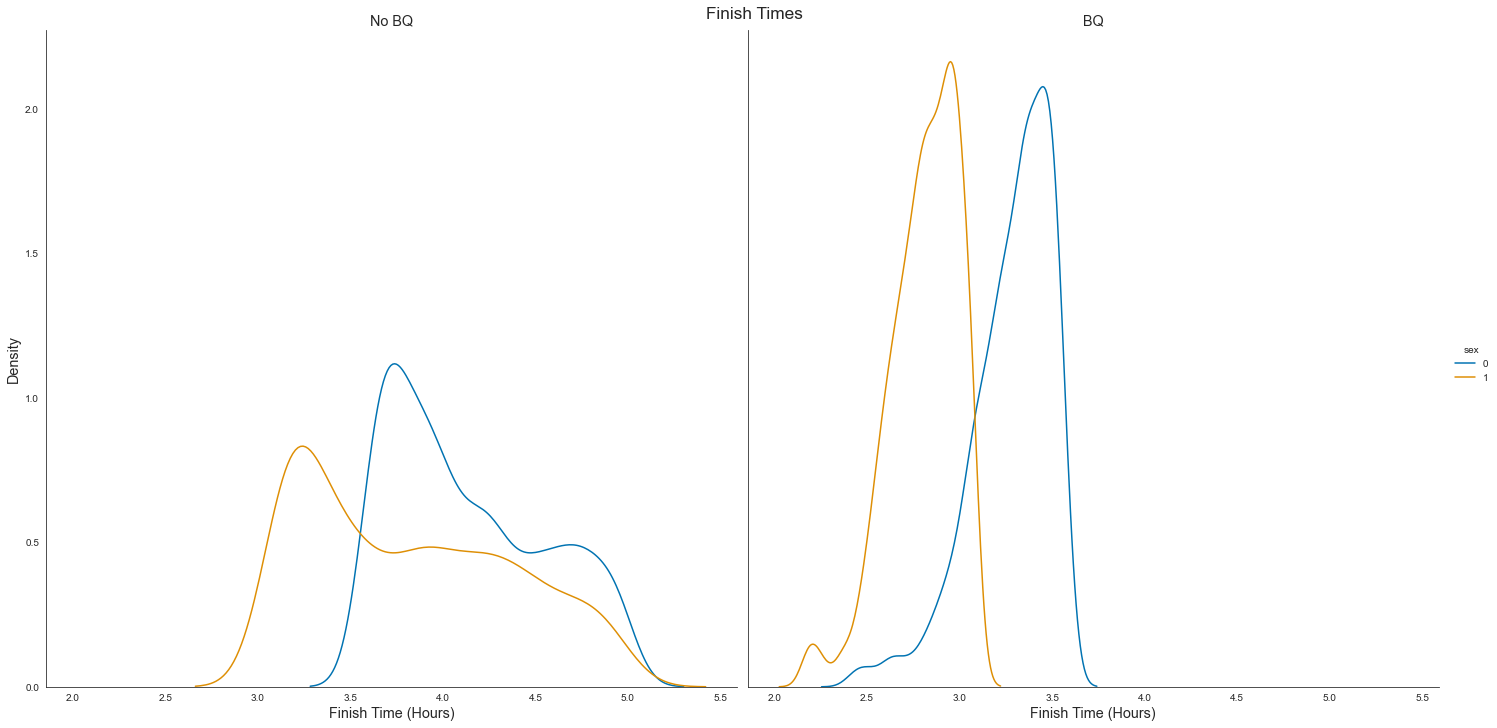

In [9]:
def marathon_facetgrid(plottype, df, x, xlabel, ylabel, title, subtitle0, subtitle1, 
                       row = None, col = None, hue = None):
    """Takes plot type, data, labels, and x, row, col, and hue parameters, shows plots with those parameters."""
    g = sns.FacetGrid(df, row = row, col = col, hue = hue, height = 10)
    g.map(plottype, x)

    g.fig.suptitle(title, fontsize = 'xx-large', y = 1)

    g.axes[0,0].set_title(subtitle0, fontdict = {'fontsize': 'x-large'})
    g.axes[0,1].set_title(subtitle1, fontdict = {'fontsize': 'x-large'})

    g.axes[0,0].set_xlabel(xlabel, fontdict = {'fontsize': 'x-large'})
    g.axes[0,1].set_xlabel(xlabel, fontdict = {'fontsize': 'x-large'})

    g.axes[0,0].set_ylabel(ylabel, fontdict = {'fontsize': 'x-large'})

    g.add_legend()

    plt.show()

marathon_facetgrid(sns.kdeplot, boston, 'finish_hours', 'Finish Time (Hours)', 'Density', 'Finish Times', 
                   'No BQ', 'BQ', col = 'bq', hue = 'sex')

Again, there are no major surprises about these distributions.

Let's break down the distribution of split differences by sex.

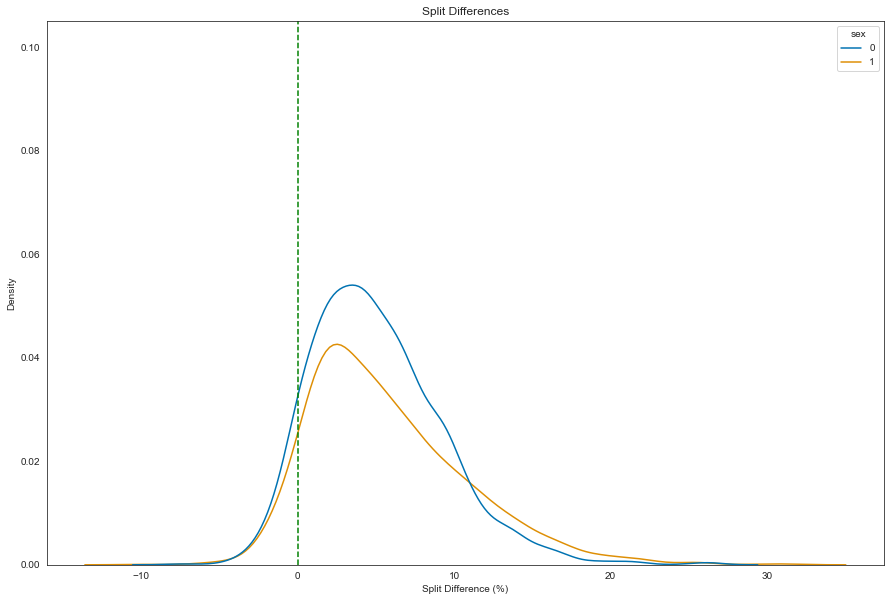

In [10]:
marathon_plot_axline(sns.kdeplot, boston, 'Split Difference (%)', 'Split Differences', x = 'split_diff', hue = 'sex')

This is fairly interesting. The distribution of men's split differences is wider than the distribution of women's split differences, and it is shifted a bit further from 0. If we were just looking at these distributions, we might conclude that women tend to run more evenly paced marathons.

Let's break this down further by both sex and BQ.

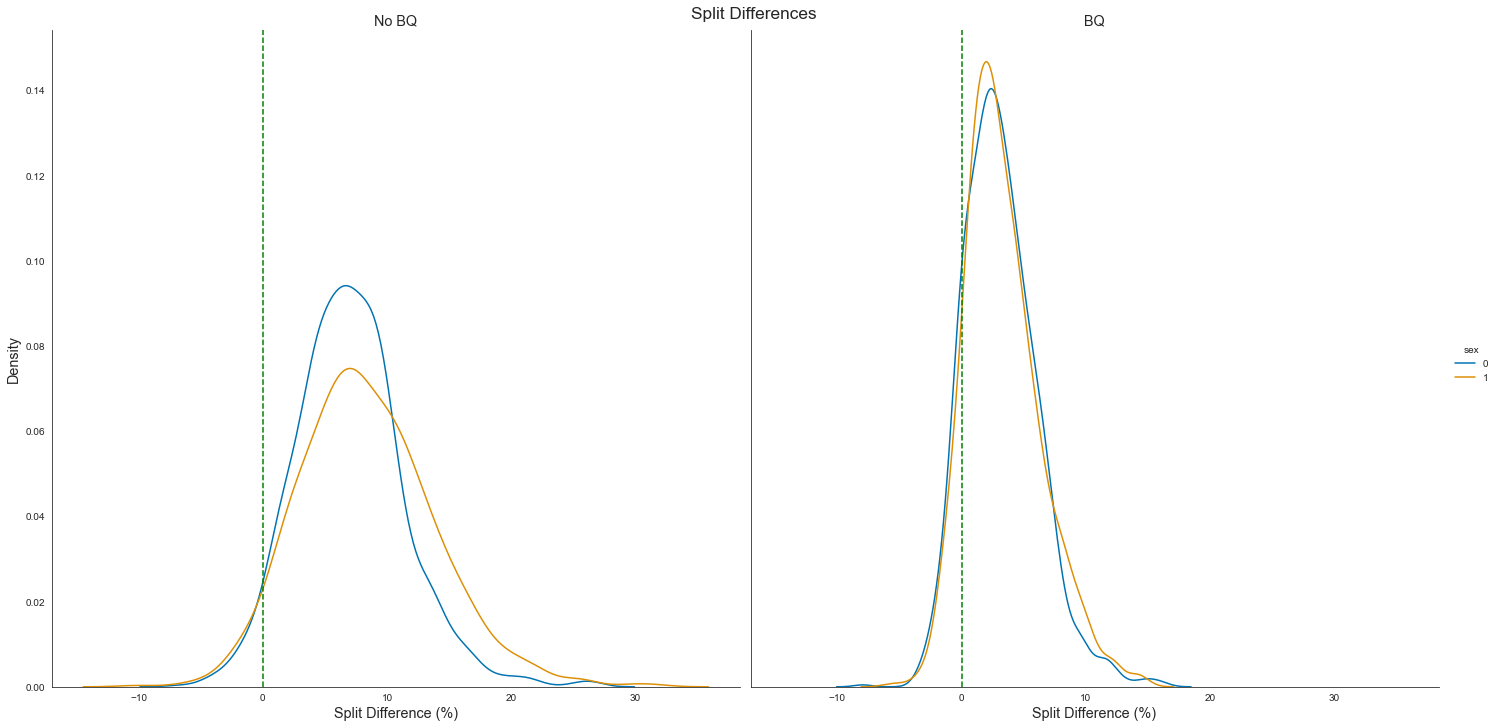

In [11]:
def marathon_facetgrid_axline(plottype, df, x, xlabel, ylabel, title, subtitle0, subtitle1, 
                       row = None, col = None, hue = None):
    """Takes plot type, data, labels, and x, row, col, and hue parameters, shows plots with those parameters 
    and axlines."""
    g = sns.FacetGrid(df, row = row, col = col, hue = hue, height = 10)
    g.map(plottype, x)

    g.fig.suptitle(title, fontsize = 'xx-large', y = 1)

    g.axes[0,0].set_title(subtitle0, fontdict = {'fontsize': 'x-large'})
    g.axes[0,1].set_title(subtitle1, fontdict = {'fontsize': 'x-large'})

    g.axes[0,0].set_xlabel(xlabel, fontdict = {'fontsize': 'x-large'})
    g.axes[0,1].set_xlabel(xlabel, fontdict = {'fontsize': 'x-large'})

    g.axes[0,0].set_ylabel(ylabel, fontdict = {'fontsize': 'x-large'})
    
    #Add dashed green lines at x = 0
    g.axes[0,0].axline((0,0), (0,0.1), linestyle = '--', color = 'g')
    g.axes[0,1].axline((0,0), (0,0.1), linestyle = '--', color = 'g')

    g.add_legend()

    plt.show()

marathon_facetgrid_axline(sns.kdeplot, boston, 'split_diff', 'Split Difference (%)', 'Density', 'Split Differences', 
                   'No BQ', 'BQ', col = 'bq', hue = 'sex')

This is VERY interesting. The distributions of split differences for men and women who also ran Boston qualifying times look almost identical, while the distributions for non-BQ runners look very similar to the overall distributions for men and women that we saw above. Just from looking at these distributions, it appears that elite runners tend to run more evenly paced marathons regardless of sex, while non-elite women tend to run more evenly paced marathons than non-elite men.

The distributions look more normal than the overall distribution of split differences, but not perfectly so. We can still see some kurtosis, especially in the "no BQ" distributions. This could be an issue later, as one of the assumptions of ANOVA is that the distribution of the y variable (i.e., split difference) is normal within each group. We will look at this more closely when we actually perform the ANOVA.

As before, let's also look at descriptive statistics for split difference broken down by both BQ and sex.

In [12]:
boston[['split_diff', 'bq', 'sex']].groupby(['bq', 'sex']).describe()

split_diff                                       
            count mean  std    min  25%  50%   75%   max
bq sex                                                  
0  0      1246.00 7.00 4.38  -6.74 4.13 6.85  9.46 26.76
   1       984.00 8.37 5.48 -10.32 4.73 7.89 11.67 31.73
1  0      1246.00 3.14 2.96  -7.93 1.02 2.82  4.92 16.34
   1      1077.00 3.35 3.05  -5.82 1.22 2.82  5.05 14.81

There is much less of a difference between men and women in the BQ group, though women still have a slightly lower mean and standard deviation. That is, women still run slightly more evenly paced marathons with less variation between runners. However, we will need to run the ANOVA to see if this difference is statistically significant.

Let's look at the data in two dimensions with a plot of finish time versus split difference.

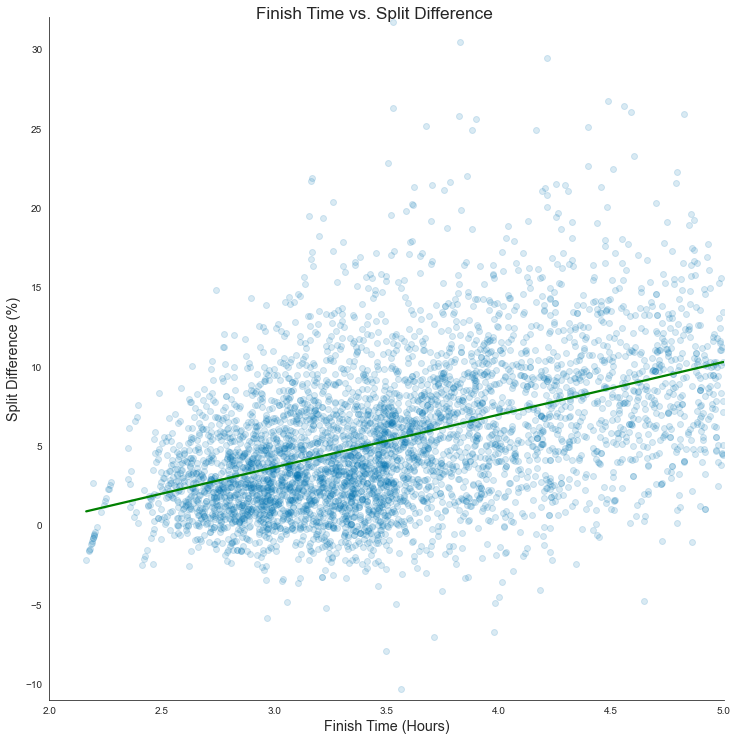

In [13]:
def marathon_scatter(df, x, y, xlabel, ylabel, title, hue = None):
    """Takes data, labels, and x, y, and hue parameters, shows scatterplot with those parameters."""
    g = sns.lmplot(data = df, x = x, y = y, hue = hue, height = 10, ci = None, 
                   scatter_kws = {'alpha': 0.15}, line_kws = {'color': 'g'})
    
    g.fig.suptitle(title, fontsize = 'xx-large', y = 1)
    
    g.ax.set_xlabel(xlabel, fontdict = {'fontsize': 'x-large'})
    g.ax.set_ylabel(ylabel, fontdict = {'fontsize': 'x-large'})
    
    g.ax.set_xlim([2, 5])
    g.ax.set_ylim([-11, 32])
    
    plt.show()

marathon_scatter(boston, 'finish_hours', 'split_diff', 'Finish Time (Hours)', 'Split Difference (%)', 
                 'Finish Time vs. Split Difference')

There appears to be a general linear trend toward more positively split races as finish time increases, though as finish time increases there is also a lot more variance between runners. This difference in variance could be an issue later when we run an ANOVA, since one of the assumptions of ANOVA is equal variance between the groups we are comparing.

Let's look at the overall correlation between finish time and split difference using the Pearson correlation coefficient.

In [14]:
print("Correlation of finish time and split difference with p-value: {}".format(
    pearsonr(boston['finish_hours'], boston['split_diff'])))

Correlation of finish time and split difference with p-value: (0.4521008054993368, 2.8461321836973715e-228)


This function displays the correlation coefficient (0.45) on the left and the p-value on the right. The correlation coefficient of 0.45 indicates a moderate correlation between finish time and split difference, while the very low p-value indicates a high level of confidence in this estimate of correlation.

Next, let's break down the data by sex.

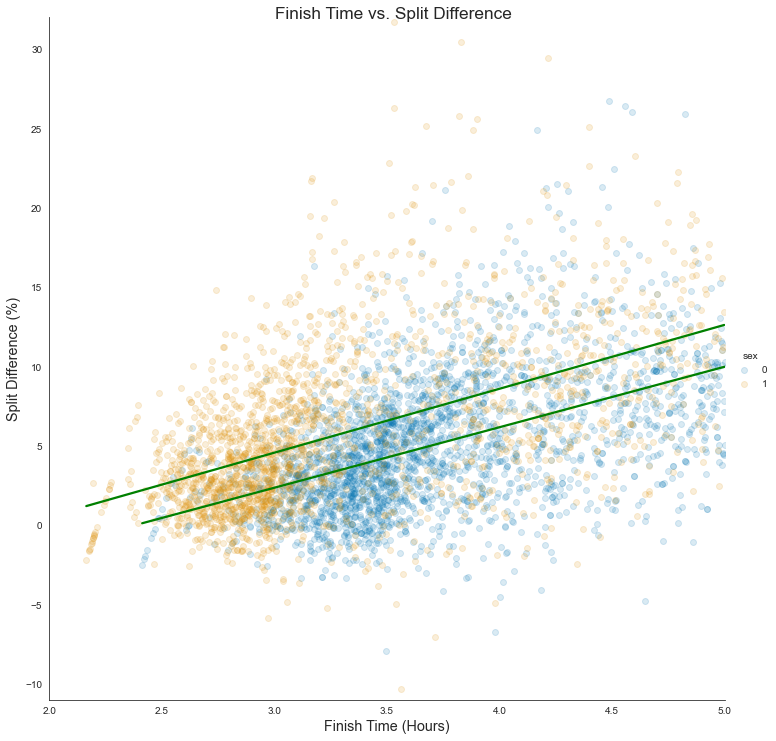

In [15]:
marathon_scatter(boston, 'finish_hours', 'split_diff', 'Finish Time (Hours)', 'Split Difference (%)', 
                 'Finish Time vs. Split Difference', hue = 'sex')

As before, we can see that the runners with the most extreme split differences are men. Otherwise, the data shows that the general trend of finish time being positively correlated with split difference still holds when we break down the data by sex.

Another interesting thing to note is that the very fastest men and women are actually running negative splits. As noted in the background to this project, some of the fastest marathons ever have been run with negative splits. So, it could be that running an evenly paced marathon is generally a better strategy than running a positively split marathon, but that the very best runners actually run negative splits. We cannot verify this in this project, but it is an interesting question to think about.

Let's look at correlation broken down by sex.

In [16]:
#Use dictionary comprehension to break data down by sex and take correlation coefficient of each piece
corr_dict = {sex: pearsonr(boston[boston['sex'] == sex]['finish_hours'], 
                           boston[boston['sex'] == sex]['split_diff']) for sex in boston['sex'].unique()}

print("Correlation of finish time and split difference with p-value (men): {}".format(corr_dict[0]))
print("Correlation of finish time and split difference with p-value (women): {}".format(corr_dict[1]))

Correlation of finish time and split difference with p-value (men): (0.4918751737723262, 5.514545471880352e-152)
Correlation of finish time and split difference with p-value (women): (0.5180178977828458, 6.839518582280283e-142)


The individual correlations for the data for each sex (0.52 for men, 0.49 for women) are higher than the overall correlation.

Next let's break the data down even further by BQ and sex.

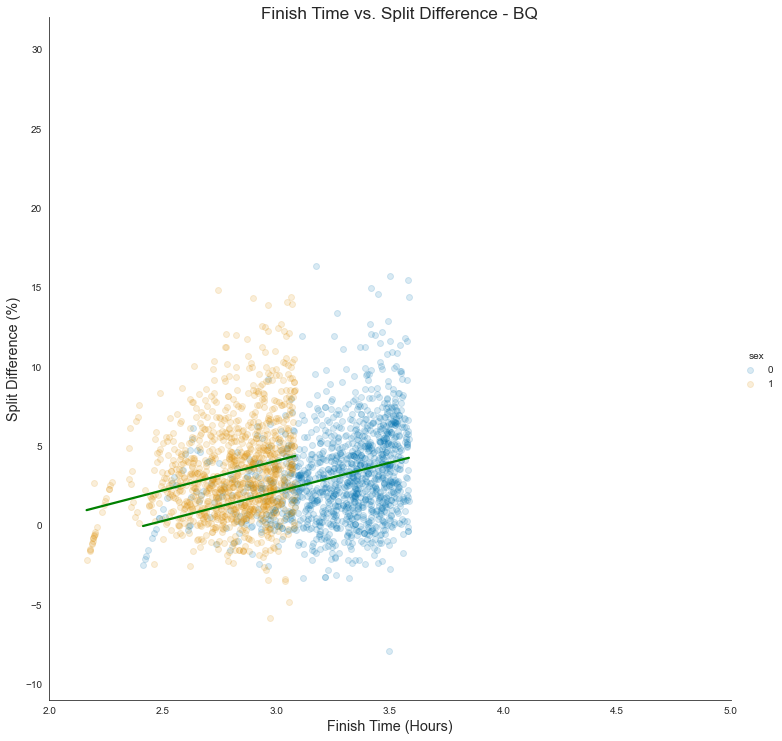

In [17]:
#Break data into BQ and non-BQ groups
boston_bq = boston[boston['bq'] == 1]
boston_nobq = boston[boston['bq'] == 0]

marathon_scatter(boston_bq, 'finish_hours', 'split_diff', 'Finish Time (Hours)', 'Split Difference (%)', 
                 'Finish Time vs. Split Difference - BQ', hue = 'sex')

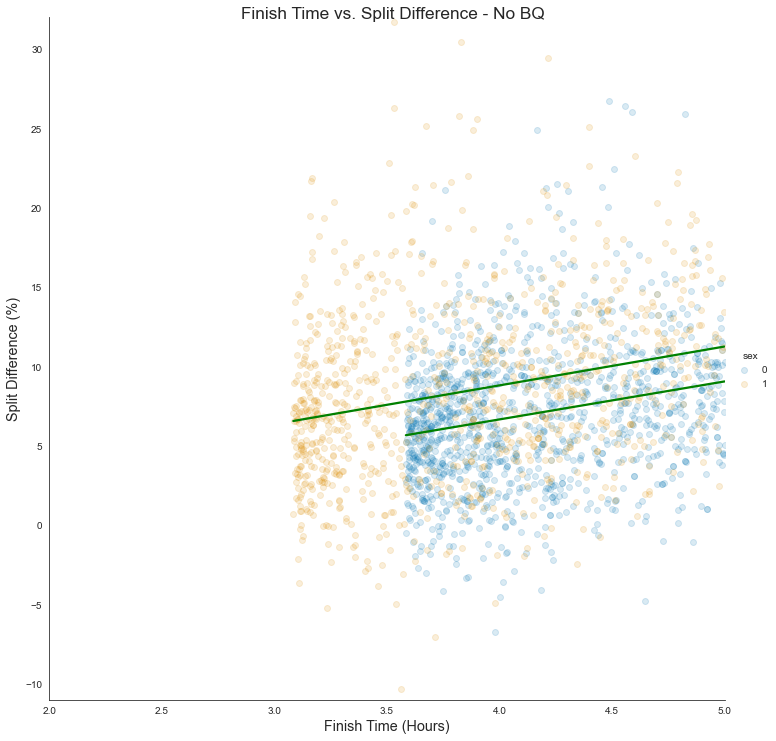

In [18]:
marathon_scatter(boston_nobq, 'finish_hours', 'split_diff', 'Finish Time (Hours)', 'Split Difference (%)', 
                 'Finish Time vs. Split Difference - No BQ', hue = 'sex')

These plots make it easier to see how much less consistent the non-BQ runners are than the BQ runners.

As before, let's look at correlations for this data.

In [19]:
#Use dictionary comprehension to break data down by sex and bq and take correlation coefficient of each piece
corr_dict = {sex: {bq: pearsonr(boston[(boston['sex'] == sex) & (boston['bq'] == bq)]['finish_hours'], 
                                boston[(boston['sex'] == sex) & (boston['bq'] == bq)]['split_diff']) 
                   for bq in boston['bq'].unique()} for sex in boston['sex'].unique()}

print("Correlation of finish time and split difference with p-value (BQ men): {}".format(corr_dict[0][0]))
print("Correlation of finish time and split difference with p-value (No BQ men): {}".format(corr_dict[0][1]))
print("Correlation of finish time and split difference with p-value (BQ women): {}".format(corr_dict[1][0]))
print("Correlation of finish time and split difference with p-value (No BQ women): {}".format(corr_dict[1][1]))

Correlation of finish time and split difference with p-value (BQ men): (0.22841696084893148, 3.271222622444944e-16)
Correlation of finish time and split difference with p-value (No BQ men): (0.2730551388216804, 9.612818405358019e-23)
Correlation of finish time and split difference with p-value (BQ women): (0.24940624712413545, 2.0313329576818124e-15)
Correlation of finish time and split difference with p-value (No BQ women): (0.22821455373213761, 3.428123732213032e-14)


Now the correlations for individual groups are actually lower than the overall correlation. This looks like it might be a mild illustration of Simpson's Paradox, where a trend that is present in the overall data disappears or reverses when the data is grouped into subsets. While we don't see an outright reversal here, we see a significant change in correlation simply based on how we group the data.

So far, we have seen a few things that might be issues for when we run our ANOVA. First, the distributions for each group are not quite normal, though they are fairly close. Second, there is unequal variance between different groups. Finally, there are some extreme split difference values that may influence the results of our ANOVA. We will address each of these in when we conduct the ANOVA and examine assumptions more closely.

For now, let's export our data and move on to the ANOVA.

In [20]:
boston.to_csv('./data/boston_eda.csv', index=False)